<a href="https://colab.research.google.com/github/jhildebrand22/HW-PS353/blob/main/12_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install whit_phys_util

     |████████████████████████████████| 10.9 MB 8.8 MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import whit_phys_util as buc

Mounted at /content/drive


In [3]:
repo = buc.local_repository('https://github.com/jhildebrand22/HW-PS353')

Cloning repository from GitHub.


# Problem 12.12

Feigenbaum relation 
> $$(\gamma_{n+1} - \gamma_n) = \frac{1}{\delta}(\gamma_n - \gamma_{n-1})$$

$$\gamma_n = \gamma_c - \frac{K}{\delta^n}$$

In [4]:
delta = 4.6692016
gamma_c = 1.0829
gamma_n = [1.0663, 1.0793, 1.0821, 1.0827]
n = [-1,-2,-3,-4]
df = pd.DataFrame()
df['gamma'] = gamma_n
df['n'] = n
df['delta'] = delta**df['n']

In [5]:
fitTable, fitFunc = buc.prettyPolyFit(df['delta'], df['gamma'])
fitTable

,slope,intercept
value,-0.077317,1.082857
uncertainty,0.000102,0.000011


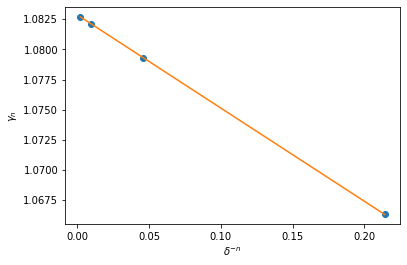

In [6]:
fig, ax = plt.subplots()
ax.plot(df['delta'], df['gamma'],'o')
ax.set_xlabel('$\delta^{-n}$')
ax.set_ylabel('$\gamma_n$');

t_fit = np.linspace(min(df['delta']),max(df['delta']),2);
ax.plot(t_fit, fitFunc(t_fit));

In [7]:
print(f"The value of K for the DDP is ({fitTable['slope']['value']:.6f} ± {fitTable['slope']['uncertainty']:.6f})")
print(f"The value of gamma_c for the DDP is ({fitTable['intercept']['value']:.7f} ± {fitTable['intercept']['uncertainty']:.7f})")

The value of K for the DDP is (-0.077317 ± 0.000102)
The value of gamma_c for the DDP is (1.0828569 ± 0.0000112)


In [8]:
gamma_g = fitTable['intercept']['value']
g_err = ((gamma_c - gamma_g)/(gamma_c)) * 100
print(f"The percent error between my gamma c and the gamma c from EQ 12.20 is {g_err:.4} ")

The percent error between my gamma c and the gamma c from EQ 12.20 is 0.00398 
